### READ ME

Use the code blocks below to answer each quiz question. Only print the output required for each question. Do not edit the comments at the top of each code cell. Otherwise, the auto-grader may misinterpret your results. See Question 0 as an an example of how to complete a task (leave it in your notebook; don't delete it):

In [1]:
# Question 0: Create a DataFrame with three rows and four columns. Name the 
# columns 'Col1', 'Col2', 'Col3', 'Col4'. Create an index for the DataFrame
# and give the rows the index values of 'Row1', 'Row2', 'Row3'. Place a value
# in each column equal to the {ColumnName/RowName}. e.g. Col1/Row1. Print
# the entire DataFrame.

import pandas as pd

df_test = pd.DataFrame(columns=['Col1', 'Col2', 'Col3', 'Col4'], index=['Row1', 'Row2', 'Row3'])

for col in df_test:
  for i, value in df_test[col].items():
    df_test.at[i, col] = f'{i}/{col}'

df_test

,Col1,Col2,Col3,Col4
Row1,Row1/Col1,Row1/Col2,Row1/Col3,Row1/Col4
Row2,Row2/Col1,Row2/Col2,Row2/Col3,Row2/Col4
Row3,Row3/Col1,Row3/Col2,Row3/Col3,Row3/Col4


### Regression Questions

The conceptual questions (which do not require coding) are skipped in this notebook

In [2]:
# Question 1: Conceptual question; answer in MyEducator. Nothing to do here

In [3]:
# Question 2: Conceptual question; answer in MyEducator. Nothing to do here

In [4]:
# Question 3: Conceptual question; answer in MyEducator. Nothing to do here

In [5]:
# Question 4: Conceptual question; answer in MyEducator. Nothing to do here 

In [6]:
# Question 5: Conceptual question; answer in MyEducator. Nothing to do here

In [7]:
# Question 6: Download the StudentsPerformance.csv dataset that is provided with this exam. Import it into a DataFrame. 
# Print a list of column names and their associated data types. Which columns would make sense to predict as a label in an MLR?

import pandas as pd

df = pd.read_csv('Data/StudentsPerformance.csv')
print(df.dtypes)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [8]:
# Question 7: Drop any rows that contain null values in any column using .dropna(). 
# Use the statsmodels package to create an MLR/OLS model to predict math score as a function of the reading score and writing score.
# Do not split the data; use the entire dataset for training. Allow the y-intercept to vary.

# Which feature best predicts their math score?

import statsmodels.api as sm

df.dropna()

X = df[['reading score', 'writing score']].assign(const=1)
y = df['math score']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):          2.25e-243
Time:                        18:57:18   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
reading score     0.6013      0.063      9.538

In [9]:
# Question 8: In the original DataFrame convert each of the non-numeric features into dummy codes. 
# Generate an OLS/MLR model (using the statsmodels package) to predict math score. 
# However, do not include either reading score or writing score as features;
# only include those dummy codes created from the categorical features. 
# Do not split the data; use the entire dataset for training. Print the results summary.

# Do test preparation courses improve math scores?

# Loop through the columns and dummy code them one-at-a-time if they are not numeric

# Loop through and drop rows
for col in df.columns:  
    if not pd.api.types.is_numeric_dtype(df[col]) and col != 'math score' and col != 'reading score' and col != 'writing score':
        df = pd.get_dummies(df, columns=[col], drop_first=True, dtype=int)

# force true/false values to numbers
df = df.apply(pd.to_numeric, errors='coerce').astype(int)        

# Make the model
X = df.drop(['math score', 'reading score', 'writing score'], axis = 1).assign(const=1)
y = df['math score'] 

math_model = sm.OLS(y, X).fit()

print(math_model.summary())


                            OLS Regression Results                            
Dep. Variable:             math score   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     28.12
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           2.62e-55
Time:                        18:57:18   Log-Likelihood:                -3990.3
No. Observations:                1000   AIC:                             8007.
Df Residuals:                     987   BIC:                             8070.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [10]:
# Question 9: Generate OLS/MLR models to predict writing scores and reading scores using the same set of features. 
# Similarly, drop the other two score features from each score model you create. 
# For example, predict reading score, but do not include math score or writing score as features. 
# Do not split the data; use the entire dataset for training. Print the results of each model summary. 

# Which score (reading, writing, or math) is most accurately predicted?

# Make reading model
X = df.drop(['math score', 'reading score', 'writing score'], axis = 1).assign(const=1)
y = df['reading score'] 

reading_model = sm.OLS(y, X).fit()

# Make writing model
X = df.drop(['math score', 'reading score', 'writing score'], axis = 1).assign(const=1)
y = df['writing score'] 

writing_model = sm.OLS(y, X).fit()

# Print results
print(f'Reading Model: \n{reading_model.summary()}')
print(f'\n\nWriting Model: \n{writing_model.summary()}')

Reading Model: 
                            OLS Regression Results                            
Dep. Variable:          reading score   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     24.19
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           8.62e-48
Time:                        18:57:18   Log-Likelihood:                -3970.5
No. Observations:                1000   AIC:                             7967.
Df Residuals:                     987   BIC:                             8031.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [11]:
df.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1


In [12]:
# Question 10: Using the last model you created to predict math score (which includes all of the dummy codes), what is the predicted math score of a child who is female, race/ethnicity_group C, parental level of education_some college, gets a reduced lunch, and has not taken a test preparation course? Print the predicted value.

math_model.predict([0,0,1,0,0,0,0,0,1,0,0,1,1])

array([54.02319714])

### Classification


In [13]:
# Question 11: Conceptual question; answer in MyEducator. Nothing to do here

In [14]:
# Question 12: Conceptual question; answer in MyEducator. Nothing to do here

In [15]:
# Question 13: Conceptual question; answer in MyEducator. Nothing to do here

In [16]:
# Question 14: Conceptual question; answer in MyEducator. Nothing to do here

In [17]:
#  Question 15: Import all needed packages for classification modeling, splitting the data, and calculating fit metrics.
# Import the Lending Club dataset found at: http://www.ishelp.info/data/lc_xs.csv.
# Alternatively, if the server is down, you can also download this data file from the MyEducator assignment description. 

# How many records are in the dataset?

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from matplotlib import pyplot as plt
import pydotplus

df2 = pd.read_csv('Data/lc_xs.csv')

print(df2.shape)

df2.head()

(20951, 35)


,loan_status,loan_status_numeric,loan_amnt,issue_d,term,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,...,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti,grade,sub_grade
0,Current,5,25000,2016-12-01,60 months,13.99,581.58,14630.570000,8353.44,6277.13,...,1.0,7165,72.4,409.0,226630.0,31.0,9900.0,9.07,C,C3
1,Charged Off,0,8000,2016-05-01,36 months,8.39,252.14,5384.790000,3749.64,785.15,...,0.0,10077,36.9,0.0,28185.0,45.0,27300.0,21.99,B,B1
2,Charged Off,0,35000,2018-05-01,60 months,18.45,897.37,2763.860000,1094.39,1669.47,...,0.0,5831,48.6,0.0,12197.0,22.0,12000.0,15.63,D,D2
3,Fully Paid,6,15000,2017-04-01,36 months,11.39,493.86,15762.912745,15000.00,762.91,...,0.0,10854,47.4,0.0,131128.0,32.0,22900.0,23.99,B,B3
4,Current,5,12500,2018-11-01,36 months,6.46,382.89,1132.970000,951.90,181.07,...,1.0,12731,43.6,0.0,55713.0,34.0,29200.0,9.07,A,A1


In [18]:
# Question 16: Run the code below. If you named your DataFrame something other than 'df', then be sure to change 'df' to whatever your DataFrame is named before running the code.

# Based on the results, do you believe that Lending Club is doing a decent job of determining who will pay back their loans?

df2['loan_status'].value_counts()

loan_status
Current               13268
Fully Paid             5484
Charged Off            1708
Late (31-120 days)      313
In Grace Period         106
Late (16-30 days)        72
Name: count, dtype: int64

In [19]:
# QUESTION 17: Drop the features: loan_status_numeric, issue_d, title, emp_title, emp_length, earliest_cr_line, 
# mths_since_last_delinq, mths_since_last_record, sub_grade. Pseudocode:
#      df.drop(columns=[name, name, ..., name], inplace=True)

# Since customers who are Current, In Grace Period, Late (16-30 days), and Late (31-120 days) have not finished their loan, 
# drop all records except for those which are Fully Paid or Charged Off. Pseudocode: 
#      df.loc[(df['column_name'] == A) | (df['column_name'] == B)]

# Drop any rows containing null data using the command: df.dropna(inplace=True). 

# Finally, create dummy codes for all remaining categorical features (but not for the label loan_status)

# Print out the first five records of the resulting DataFrame. How many columns are left after completing each of these tasks?


# Drop indicated values
df2.drop(columns=['loan_status_numeric', 'issue_d', 'title', 'emp_title','earliest_cr_line','mths_since_last_delinq','mths_since_last_record','sub_grade'], inplace=True)
df2 = df2.loc[(df2['loan_status'] == 'Fully Paid') | (df2['loan_status'] == 'Charged Off')]
df2.dropna(inplace=True)

loan_status = df2['loan_status']

# Dummy Code
for col in df2.columns:  
    if not pd.api.types.is_numeric_dtype(df2[col]) and col != 'loan_staus':
        df2 = pd.get_dummies(df2, columns=[col], drop_first=True, dtype=int)

# force true/false values to numbers
df2 = df2.apply(pd.to_numeric, errors='coerce').astype(int) 

df2['loan_status'] = loan_status

# Display df2
print(df2.shape)
df2.head()

(6682, 55)


,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,loan_status
1,8000,8,252,5384,3749,785,0,59000,0,0,...,1,0,0,1,0,0,0,0,0,Charged Off
2,35000,18,897,2763,1094,1669,0,50000,0,0,...,1,0,1,0,0,1,0,0,0,Charged Off
3,15000,11,493,15762,15000,762,0,98000,0,0,...,0,0,1,1,0,0,0,0,0,Fully Paid
6,27250,17,975,27961,27250,711,0,120000,0,0,...,1,0,1,0,0,1,0,0,0,Fully Paid
10,30000,9,629,10403,4499,2406,0,60000,0,0,...,1,1,0,1,0,0,0,0,0,Charged Off


In [20]:
# Question 18: Set the y and X datasets assuming that loan_status will be the label. Print the first 5 records of X
X = df2.drop(['loan_status'], axis = 1).assign(const=1)
y = df2['loan_status'] 

X.head()

,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,const
1,8000,8,252,5384,3749,785,0,59000,0,0,...,1,0,0,1,0,0,0,0,0,1
2,35000,18,897,2763,1094,1669,0,50000,0,0,...,1,0,1,0,0,1,0,0,0,1
3,15000,11,493,15762,15000,762,0,98000,0,0,...,0,0,1,1,0,0,0,0,0,1
6,27250,17,975,27961,27250,711,0,120000,0,0,...,1,0,1,0,0,1,0,0,0,1
10,30000,9,629,10403,4499,2406,0,60000,0,0,...,1,1,0,1,0,0,0,0,0,1


In [21]:
# Question 19: Split the data using a 50/50 split and random seed = 12345

# Next, train a Decision Tree Classifier model using a random_state=12345 and fit the model with the appropriate data set

# Print the Accuracy score using either the .accuracy_score() or .score() method of the Decision Tree Classifier model object. Be sure to pass in the appropriate data into those objects. What is that score? Copy and paste the entire number with all decimals included

from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets with a 50/50 split and random seed 12345
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)

# Decision Tree Classifier model 
clf = DecisionTreeClassifier()

# Fit the model 
clf.fit(X_train, y_train)

# Print the accuracy score 
accuracy = clf.score(X_test, y_test)
print("Accuracy score:", accuracy)

Accuracy score: 1.0


In [22]:
# Question 20: Predict the labels for test dataset and display them in a dataframe along with the actual values. 
# Print only the LAST 10 records. Which row index was predicted incorrectly in these last 10 records? 

# Predict the labels 
y_pred = clf.predict(X_test) 

# predicted versus actual

output_df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
output_df3.tail(10)

,Actual,Predicted
5277,Fully Paid,Fully Paid
6970,Charged Off,Charged Off
15470,Fully Paid,Fully Paid
16103,Charged Off,Charged Off
19360,Fully Paid,Fully Paid
19669,Fully Paid,Fully Paid
14507,Charged Off,Charged Off
3189,Fully Paid,Fully Paid
16593,Fully Paid,Fully Paid
18213,Charged Off,Charged Off


## Clustering


In [23]:
# Question 21: Conceptual question; answer in MyEducator. Nothing to do here.

In [24]:
# Question 22: Conceptual question; answer in MyEducator. Nothing to do here.

In [25]:
# Question 23: Conceptual question; answer in MyEducator. Nothing to do here.

In [26]:
# Question 24: Conceptual question; answer in MyEducator. Nothing to do here.

In [27]:
# Question 25: Conceptual question; answer in MyEducator. Nothing to do here.

In [28]:
# Question 26: Import the necessary libraries to perform your Clustering analysis. 
# Once again, use the Lending Club dataset (lc_xs.csv) but reimport a fresh copy into a DataFrame
# Next, remove all columns that are not numeric.
# Once quick way to do that is using the np.number method of the numpy package: df.select_dtypes(np.number)
# Also, remove loan_status_numeric from the DataFrame since that is typically considered a label 
# and we are going to generate our own cluster/label.
# After completing the prior step, remove all rows that contain any null values (see the example code given to you above).
# Finally, scale the remaining DataFrame using a MinMaxScalar().
# Print the first 5 records. What is the loan amount of the second row after scaling (Index 1)?

import pandas as pd
import numpy as np
from sklearn import preprocessing
from scipy.spatial import distance as sdist
from sklearn.preprocessing import MinMaxScaler

df3 = pd.read_csv('Data/lc_xs.csv')

# Remove not numeric columns and loan_status_numeric
df3_num = df3.select_dtypes(include=np.number).drop(columns=['loan_status_numeric'])

# Drop null
df3_num.dropna(inplace=True)

#MinMaxScaler
df3_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df3_num), columns=df3_num.columns)

df3_minmax.head()


,loan_amnt,int_rate,installment,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,annual_inc,acc_now_delinq,delinq_2yrs,...,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,tot_coll_amt,tot_cur_bal,total_acc,total_rev_hi_lim,dti
0,0.615385,0.338006,0.406298,0.332336,0.208836,0.362664,0.000000,0.078689,0.0,0.000000,...,0.572650,0.150,0.0,0.020624,0.708415,0.003575,0.153101,0.329268,0.026799,0.087799
1,0.435897,0.260125,0.272744,0.327031,0.237382,0.283325,0.000000,0.073189,0.0,0.111111,...,0.547009,0.175,0.0,0.043504,0.802348,0.000000,0.051893,0.463415,0.051558,0.280700
2,0.102564,0.240654,0.099272,0.123910,0.125000,0.031156,0.000000,0.048792,0.0,0.111111,...,0.675214,0.350,0.0,0.022434,0.732877,0.000000,0.056422,0.304878,0.028255,0.246589
3,0.102564,0.288941,0.101460,0.019922,0.017672,0.017134,0.000000,0.039034,0.0,0.111111,...,0.615385,0.275,0.0,0.014939,0.409980,0.003610,0.031795,0.231707,0.034081,0.393316
4,0.076923,0.104361,0.070148,0.096487,0.100000,0.018090,0.142694,0.117102,0.0,0.000000,...,0.452991,0.350,0.0,0.032425,0.236791,0.000000,0.255211,0.317073,0.133702,0.128535


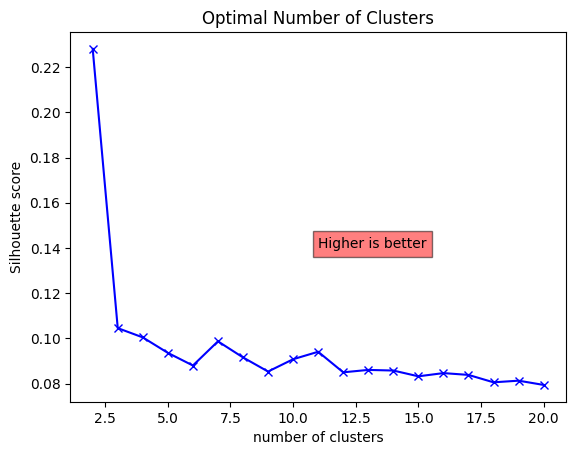

In [29]:
# Question 27: Next, let's perform a Silhouette analysis to determine the optimal number of clusters.
# Calculate a silhouette score for KMeans models with n number of clusters = 2 though 20.
# Plot the results. What is the optimal number of clusters?

 # Silhouette Analysis
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from matplotlib import pyplot as plt


si_score = []
for n in range(2, 21):
    kmeans = KMeans(n, random_state=1, n_init='auto').fit(df3_minmax)
    si_score.append(silhouette_score(df3_minmax, kmeans.labels_))

plt.plot(range(2, 21), si_score, 'bx-')
plt.xlabel('number of clusters') 
plt.ylabel('Silhouette score') 
plt.title('Optimal Number of Clusters')
plt.text(11, .14, 'Higher is better', bbox=dict(facecolor='red', alpha=0.5))
plt.show()

In [33]:
# Question 28: Generate a KMeans model using two clusters and a random seed of 12345.
# Add the assigned clusters as a new column in DataFrame.

# Which cluster has the most assigned cases? 

kmeans = KMeans(n_clusters=2, random_state=12345, n_init='auto').fit(df3_minmax)

df3_minmax['Cluster'] = kmeans.labels_

cluster_counts = df3_minmax['Cluster'].value_counts()
cluster_counts['Cluster'] = kmeans.labels_
print(cluster_counts)

Cluster
0                                                       1076
1                                                        372
Cluster    [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...
Name: count, dtype: object


In [36]:
# Question 29: Create a new DataFrame that displays the means of each feature seperately for the cases assigned both clusters
# (just like the example in the book). 

# Which features played the largest role in determining clusters?
# Copy and paste the full name below exactly as it appears with no leading or trailing spaces.

df_wcluster = df3_minmax.copy()
df_wcluster['Cluster'] = kmeans.labels_


output_df = pd.DataFrame({'C0_means': df_wcluster[df_wcluster.Cluster == 0].mean(), 'C1_means': df_wcluster[df_wcluster.Cluster == 1].mean()})
output_df['diff'] = abs(output_df['C0_means'] - output_df['C1_means'])
output_df.drop(['Cluster']).sort_values(by=['diff'], ascending=False)

,C0_means,C1_means,diff
loan_amnt,0.224906,0.590893,0.365987
installment,0.201018,0.523230,0.322213
total_pymnt,0.136170,0.430170,0.294001
total_rec_prncp,0.117128,0.360157,0.243029
total_rec_int,0.075468,0.249368,0.173900
int_rate,0.326792,0.414623,0.087832
mths_since_last_record,0.593961,0.525113,0.068849
revol_util,0.427656,0.486180,0.058525
tot_cur_bal,0.076136,0.123215,0.047078
annual_inc,0.073883,0.118452,0.044569


In [46]:
# Question 30: What is the predicted/assigned cluster for a new loan with the following values:? [0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05]

prediction = kmeans.predict([[0.9, 0.33, 0.34, 0.30, 0.25, 0.17, 1.0, 0.18, 0.0, 0.0, 0.0, 0.37, 0.54, 0.17, 0.04, 0.08, 0.70, 1.0, 0.02, 0.23, 0.12, 0.05,0]])[0]

/Users/graceogden/Documents/BYU/2024Winter/IS455/ClassCode455/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
